<a href="https://colab.research.google.com/github/Jihoon0309/Data_study_book/blob/main/%08Chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통계적으로 추론하기

**모수검정이란**</br>

모수검정 : 모집단에 대한 파라미터(평균, 분산 등)를 추정하는 방법</br>
ex) 우리나라 청소년의 몸무게 평균을 알고 싶다면 이 경우 모집단은 대한민국의 전체 청소년</br>

모든 청소년의 몸무게 조사하기 어렵기 때문에 일부 청소년의 몸무게를 조사한 다음 전체 청소년 평균 몸무게를 추정하는것이 모수검정 이때 선택한 일부 샘플은 표본 이라고 부부름

**표준점수 구하기**</br>

표준점수(z점수) : 데이터가 정규분표를 따른다고 가정하고, 각 값이 평균에서 얼마나 떨어져 있는지 표준편차를 사용해 변환한 점수</br>
평균까리 거리를 표준편차로 나눈것

z 점수 구하기

In [2]:
import numpy as np

x=[0, 3, 5, 7, 10]
s=np.std(x) # 표준편차
m=np.mean(x) # 평균
z=(7-m)/s
print(z)

0.5872202195147035


In [3]:
from scipy import stats

stats.zscore(x)

array([-1.46805055, -0.58722022,  0.        ,  0.58722022,  1.46805055])

사이파이로 편리하게 계산할 수 있음</br>
사이파이의 stats 모듈을 임포트 한 후 zscore() 함수를 호출하여 x에 대한 z 점수를 계산할 수 있음

누적분포 이해하기</br>

표준정규분포 : 평균이 0이고 표준편차가 1인 정규분포</br>
ex) 표준정규분포에서 z 점수가 1.0 이내에 위치한 샘플은 전체의 약 68%에 해당하고 2.0 이내에 위치한 샘플은 전체의 약 95%에 해당함

누적분포 구하기</br>

stats 모듈에 norm.cdf() 메서드는 누적된 분포를 반환해 줌</br>
평균 0까지는 정확히 50%가 될 것임

In [4]:
stats.norm.cdf(0)

0.5

z 점수가 1이내의 비율을 구하려면 1까지 누적분포에서 -1까지 누적분포를 빼면 됨.

In [5]:
stats.norm.cdf(1)-stats.norm.cdf(-1)

0.6826894921370859

In [6]:
stats.norm.cdf(2)-stats.norm.cdf(-2)

0.9544997361036416

비율에 해당하는 z점수를 구하라며녀 norm.ppf() 메서드 이용

In [7]:
stats.norm.ppf(0.9) # 90% 누적분포 해당하는 z 점수

1.2815515655446004

**중심극한정리 알아보기**</br>

중심극한정리 : 무작위로 샘플을 뽑아 만든 표본의 평균은 정규 분포에 가깝다</br>
모집단에서 30개의 샘플을 뽑아 표본을 만들고 표본의 평균을 계산함</br>
이러한 과정을 여러 번 반복해서 1000개의 평균을 만들어 놓고 1000개의 평균을 히스토그램으로 그리면 정규분포를 따름

In [9]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 155MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


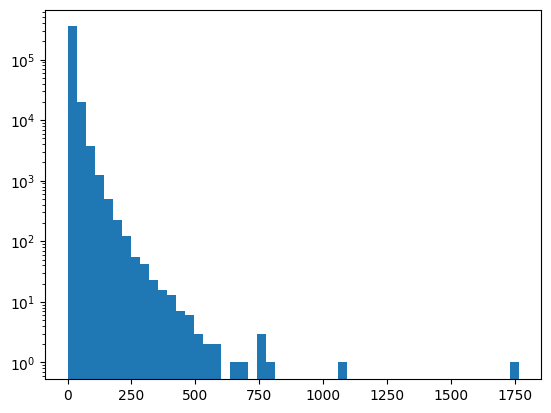

In [10]:
import matplotlib.pyplot as plt

plt.hist(ns_book7['대출건수'], bins=50)
plt.yscale('log')
plt.show()

샘플링하기</br>

샘플링 : 표본을 추출하는것 </br>
무작위로 1000개의 표본을 샘플링하여 각 평균을 리스트로 저장함 </br>
sample() 메서드 사용하여 무작위 샘플링함

In [12]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
  m = ns_book7['대출건수'].sample(30).mean()
  sample_means.append(m)

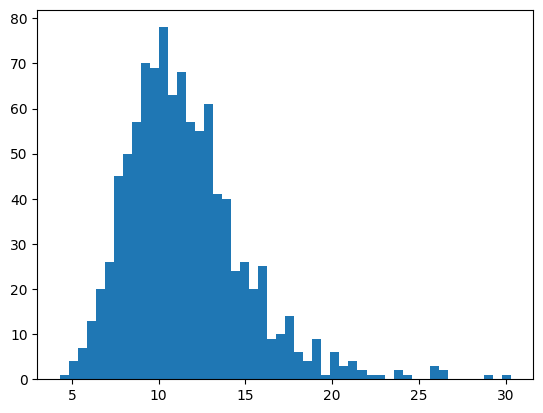

In [14]:
plt.hist(sample_means, bins=50)
plt.show()

좌우 대칭이 완벽하지는 않지만 종 모양과 유사한 분포를 형성함

샘플링 크기와 정확도</br>

이 정규분포 형태의 평균이 모집단의 평균과 매우 가깝다는 것을 볼 수있음

In [16]:
print(np.mean(sample_means))
print(ns_book7['대출건수'].mean())

11.539900000000001
11.593438968070707


샘플링의 크기가 30보다 클수록 좋음 샘플링의 크기를 20으로 낮추어서 계산 해봄

In [18]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
  m = ns_book7['대출건수'].sample(20).mean()
  sample_means.append(m)
np.mean(sample_means)

11.39945

In [19]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
  m = ns_book7['대출건수'].sample(40).mean()
  sample_means.append(m)
np.mean(sample_means)

11.5613

샘플링의 크키가 작아지면 평균에서 더 멀어지고 샘플링 크기가 커질 수록 평균과 가까워지는걸 볼 수 있음

표본평균의 표준편차가 모집단의 표준편차를 표본 크기의 젭곤으로 나눈 것에 가깝다는 것을 볼 수 있음

In [20]:
np.std(sample_means)

3.0355987564235165

In [21]:
np.std(ns_book7['대출건수']) / np.sqrt(40)

3.048338251806833

이렇게 구한 표본 평균의 표준편차는 표준오차 라고 함

**모집단의 평균 범위 추정하기: 신뢰구간**</br>

신뢰구간 : 표본의 파라미터(여기에서는 평균)가 속할 것이라 믿는 모집단의 파라미터 범위

In [22]:
python_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('파이썬') # 주제분류번호가00으로 시작하고 도서명에 파이썬이 포함된 책들의 인덱스
python_books = ns_book7[python_books_index]
python_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1040,1060,실전 알고리즘 트레이딩 배우기 (파이썬으로 시작하는 알고리즘 트레이딩의 기초와 실전...,세바스티앙 도나디오.수라브 고쉬 지음|이기홍,에이콘출판,2021,9791161754901,NaN,NaN,NaN,004.73,1,1,2021-03-09
1162,1185,파이썬으로 경험하는 빅데이터 분석과 머신러닝,"이영호,이수현 지음",생능출판사,2021,9788970504803,NaN,9,NaN,005.135,1,1,2021-03-02
1447,1504,금융 파이썬 쿡북 (금융 데이터 처리와 기술 분석부터 딥러닝 적용까지),에릭 르윈슨,에이콘출판,2021,9791161750507,NaN,NaN,NaN,005.133,1,2,2021-02-22
1563,1630,프로그래머를 위한 파이썬 (실전 프로젝트로 배우는 소프트웨어 개발의 원리와 정석),데인 힐라드 지음|황반석,제이펍,2020,9791190665636,NaN,NaN,NaN,005.133,1,2,2021-02-16
1571,1640,"엑셀 × 파이썬 업무 자동화 - 매크로, VBA는 이제 낡았다!","카네히로 카즈미 (지은이), 서수환 (옮긴이)",인사이트,2020,9788966262847,NaN,NaN,NaN,005.53,1,2,2021-02-16


In [23]:
len(python_books)

251

In [24]:
python_mean = np.mean(python_books['대출건수'])
python_mean

14.749003984063744

방금 구한 파이썬 대출건수가 표본이라면 우리나라의 모든 도서관의 파이썬 도서 대출건수를 모집단으로 생각할 수 있음 하지만 모든 도서관 데이터 구하기는 힘듦</br>
이럴 때 중심극한정리를 적용해 볼 수 있음 모집단의 표준편차가 표본의 표준편차와 비슷하다고 가정하는 것

In [25]:
python_std = np.std(python_books['대출건수'])
python_se = python_std / np.sqrt(len(python_books))
python_se

0.8041612072427442

표준오차에 곱할 적절한 z 점수를 결정해야 함 평균이 모집단의 평균을 중심으로 95% 이내 구간에 포함된다고 확신하고 싶으면</br>
95% 비율에 해당한느 z 점수을 찾아야함

In [26]:
stats.norm.ppf(0.975)

1.959963984540054

In [27]:
stats.norm.ppf(0.025)

-1.9599639845400545

표준오차 python_se와 z 점수를 솝하여 파이썬 도서의 대출건수 평균인 python_mean 데이터프레임이 속할 범위를 위해야함

In [28]:
print(python_mean-1.96*python_se, python_mean+1.96*python_se)

13.172848017867965 16.325159950259522


표본의 평균과 표준오차를 바탕으로 모집단의 평균이 13.2에서 16.3 사이에 놓여 있을 거라 95% 확신한다 라고 말 할 수 있다.

**통계적 의미 확인하기: 가설검정**</br>

가설검정 : 표본에 대한 정보를 사용해 모집단의 파라미터에 대한 가정을 검정하는 것</br>
ex) 파이썬과 C++ 도서의 평균 대출건수가 같다고 가정했을 때 각각 표본을 추출하여 이 가정이 맞는지 검정 함</br>
대출건수가 같다는 가설을 영가설 또는 귀무가설 이라고 부르고 대출건수가 같지 않다는 가설을 대립가설 이라 부름</br>

영가설 : 표본 사이에 통계적으로 의미가 없다고 예상되는 가설</br>
대립가설 : 표본 사이에 통계적인 차이가 있다는 가설</br>


z 점수로 가설 검증하기</br>

In [30]:
cplus_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('C++', regex=False)
cplus_books = ns_book7[cplus_books_index]
cplus_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
101,103,C++를 사용한 언리얼 엔진 4 개발 2/e (100여 개의 레시피를 통해 배우는 ...,존 도란.윌리엄 셰리프.스테판 화이틀 지음|조경빈,에이콘,2020,9791161754659,NaN,NaN,NaN,005.11,1,1,2021-03-15
19754,20779,Game Programming in C++,산자이 마드하브,에이콘출판,2019,9791161753560,NaN,NaN,NaN,005.133,1,10,2019-11-26
20198,21289,C++ API OpenCV 프로그래밍 - 2nd Edition,김동근,가메출판사,2016,9788980782864,NaN,NaN,NaN,004.77,1,5,2019-11-05
21630,22950,Visual C++ 영상처리 프로그래밍 =Visual C++ image proces...,황선규 지음,길벗,2015,9791186978153,NaN,9,NaN,004.77,1,3,2019-10-22
22461,23859,Functional Programming in C++,"이반 추키츠 지음, 김점갑 옮김",에이콘출판,2019,9791161753416,NaN,NaN,NaN,005.133,1,4,2019-09-26


In [31]:
len(cplus_books)

89

In [32]:
cplus_mean = np.mean(cplus_books['대출건수'])
cplus_mean

11.595505617977528

In [33]:
cplus_se = np.std(cplus_books['대출건수']) / np.sqrt(len(cplus_books))
cplus_se

0.9748405650607009

In [34]:
(python_mean - cplus_mean) / np.sqrt(python_se**2 + cplus_se**2)

2.495408195140708

In [35]:
stats.norm.cdf(2.50)

0.9937903346742238

t-검정으로 가설 검증하기</br>
사이파이에 두 표본의 평균을 비교하는 ttest_ind() 함수가 있음</br>
t-검정 : t-분포인 두 표본을 두 표본을 비교함</br>
t-분포 : 정규분포와 비슷하지만, 중앙은 조금 더 낮고 꼬리가 더 두꺼움 분포</br>

표본 크기가 30 이하일 때 t-분포를 사용하는 것이 좋음

In [36]:
t, pvalue = stats.ttest_ind(python_books['대출건수'], cplus_books['대출건수'])
print(t, pvalue)

2.1390005694958574 0.03315179520224784


**정규분포가 아닐 때 가설 검증하기: 순열검정**</br>

순열검정 : 모집단의 분포가 정규분포를 따르지 않거나 모집단의 분포를 알 수 없을 때 사용할 수 있는 방법</br>

도서 대출건수 평균 비교하기(1): 파이썬 vs C++

In [37]:
def statistic(x, y):
  return np.mean(x) - np.mean(y)

무작위로 추출하기 위해 permutation() 함수를 사용함

In [38]:
def permutation_test(x, y):
  obs_diff = statistic(x, y) # 표본의 평균 차이를 계산
  all = np.append(x, y) # 두 표본을 합침
  diffs=[]
  np.random.seed(42)
  for _ in range(1000):
    idx = np.random.permutation(len(all)) # 랜덤하게 두 그룹으로 나눈 다음 평균 차이를 계산함
    x_=all[idx[:len(x)]]
    y_=all[idx[len(x):]]
    diffs.append(statistic(x_, y_))

  less_pvalue = np.sum(diffs < obs_diff)/1000 # 원본 표본보다 작거나 큰 경우의 p-값을 계산합니다.
  greater_pvalue = np.sum(diffs > obs_diff)/1000
  return obs_diff, np.minimum(less_pvalue, greater_pvalue)*2 # 둘 중 작은 p-값을 선택해 2를 곱하여 최종 p- 값을 반환

In [39]:
permutation_test(python_books['대출건수'], cplus_books['대출건수'])

(3.1534983660862164, 0.022)